### 🎈Twitter Sentiment Analysis using NLP🎈

### Problem Statement: 
 The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.
 Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.

#### Things we cover in this analysis : 

1.Understand the Problem Statement
2.Tweets Preprocessing and Cleaning
     o	Data Cleaning
3.Story Generation and Visualization from Tweets
4.Extracting Features from Cleaned Tweets
     o	Bag-of-Words
     o	TF-IDF
     o	Word Embeddings
5.Model Building: Sentiment Analysis
     o	Logistic Regression
     o	Support Vector Machine
     o	RandomForest
     o	XGBoost
6.Model Fine-tuning
7.Summary


#### Importing Neccessary Libraries

In [121]:
import re    # for regular expressions 
import nltk  # for text manipulation  
import string #for string manipulations
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

 Download the train and test dataset from the git repo by cloning the repository using git bash
 > git clone https://github.com/mangipudiprashanth7/Twitter_Sentiment_Analysis-Using-ML-and-NLP.git

#### Let’s read train and test datasets.

In [122]:
train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

Text is a highly unstructured form of data, various types of noise are present in it and the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing. We will divide it into 2 parts:
#### 1.Data Inspection
#### 2.Data Cleaning

#### Data Inspection
Let’s check out a few non racist/sexist tweets.



In [123]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [124]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [125]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


#### There are quite a many words and characters which are not really required. So, we will try to keep only those words which are important and add value.

In [126]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [127]:
train['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

#### In the train dataset, we have 2,242 (7%) tweets labeled as racist or sexist, and 29,720 (93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

#### Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

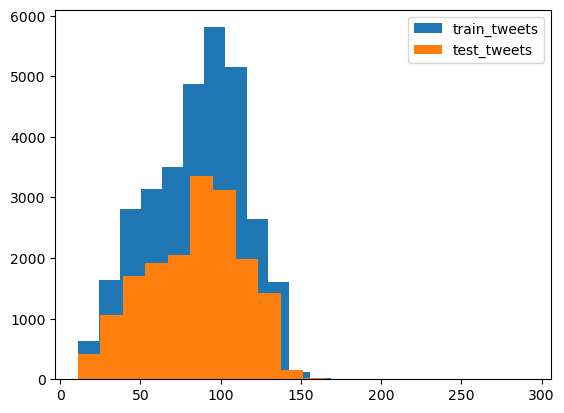

In [128]:
train_length = train['tweet'].str.len()
test_length = test['tweet'].str.len()
plt.hist(train_length,bins=20,label="train_tweets")
plt.hist(test_length,bins=20,label="test_tweets")
plt.legend()
plt.show()

In [129]:
??plt.hist

In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

Before we begin cleaning, let’s first combine train and test datasets. Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

In [130]:
combi = pd.concat([test,train], ignore_index=True)
combi.shape

(49159, 3)

#### Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [131]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt    

In [132]:
?np.vectorize

#### 1. Removing Twitter Handles (@user)
Let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [133]:
#removing twitter handles @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,tweet,label,tidy_tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,NaN,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,NaN,#white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,NaN,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",NaN,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",NaN,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


#### 2. Removing Punctuations, Numbers, and Special Characters

Here we will replace everything except characters and hashtags with spaces. The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

In [134]:
#removing punctuations , numbers and spl charecters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head()

,id,tweet,label,tidy_tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,NaN,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,NaN,#white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,NaN,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",NaN,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",NaN,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


#### 3. Removing Short Words

We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [135]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split()  if len(w)>3]))
combi.head()

,id,tweet,label,tidy_tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,NaN,#studiolife #aislife #requires #passion #dedication #willpower find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,NaN,#white #supremacists want everyone #birdsâ #movie hereâs
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,NaN,safe ways heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",NaN,"cursed child book reservations already? yes, where? when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",NaN,"#bihday amazing, hilarious #nephew ahmir! uncle dave loves missesâ¦"


#### 4. Text Normalization

Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [136]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.tail()

49154                                                               [that, youuu?ðððððððððâ¤ï¸]
49155    [nina, turner, airwaves, trying, wrap, herself, mantle, genuine, hero, like, shirley, chisolm., #shame, #imwithher]
49156                                                                              [listening, songs, monday, morning, work]
49157                                                                [#sikh, #temple, vandalised, #calgary,, #wso, condemns]
49158                                                                                                        [thank, follow]
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized tweets.

In [137]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
#stemming
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

#Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet    

In [139]:
combi['tidy_tweet'].tail()

49154                                          that youuu?ðððððððððâ¤ï¸
49155    nina turner airwav tri wrap herself mantl genuin hero like shirley chisolm. #shame #imwithh
49156                                                                   listen song monday morn work
49157                                                   #sikh #templ vandalis #calgary, #wso condemn
49158                                                                                   thank follow
Name: tidy_tweet, dtype: object

In [18]:
!pip install wordcloud

### Story Generation and Visualization from Tweets

In this section, we will explore the cleaned tweets. Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights. Do not limit yourself to only these methods told in this course, feel free to explore the data as much as possible.

Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

    What are the most common words in the entire dataset?
    What are the most common words in the dataset for negative and positive tweets, respectively?
    How many hashtags are there in a tweet?
    Which trends are associated with my dataset?
    Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

##### A) Understanding the common words used in the tweets: WordCloud

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

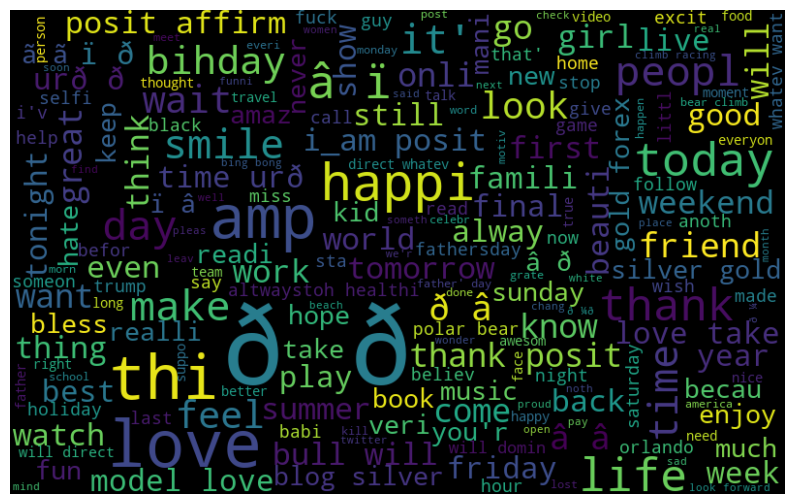

In [155]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 30))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

### B) Words in non racist/sexist tweets


Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

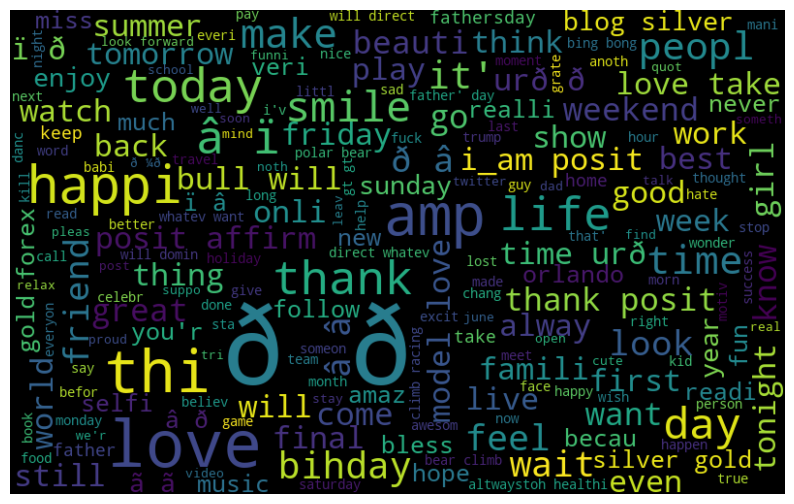

In [156]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

### C) Racist/Sexist Tweets

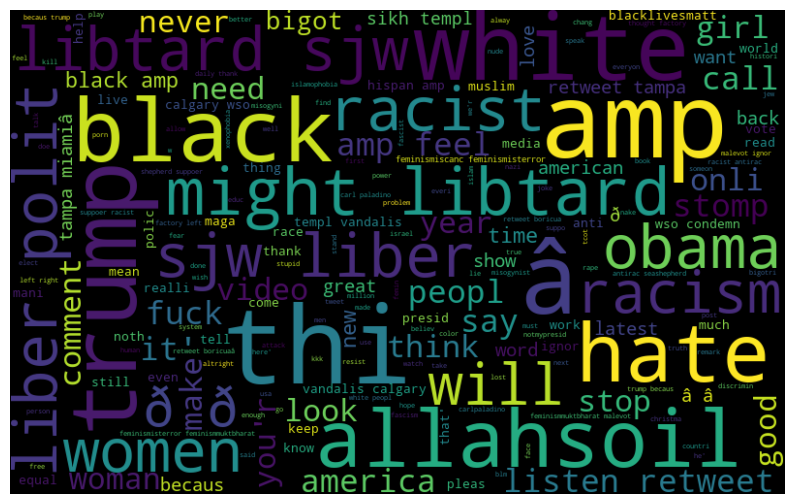

In [157]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

### D) Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

For instance, given below is a tweet from our dataset:
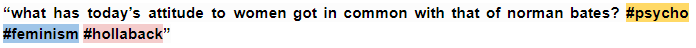

The tweet seems sexist in nature and the hashtags in the tweet convey the same feeling.

We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [158]:
# function to collect hashtags
def hashtag_extract(x):    
    hashtags = []  
    # Loop over the words in the tweet  
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)     
    return hashtags

In [159]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

#### Non-Racist/Sexist Tweets

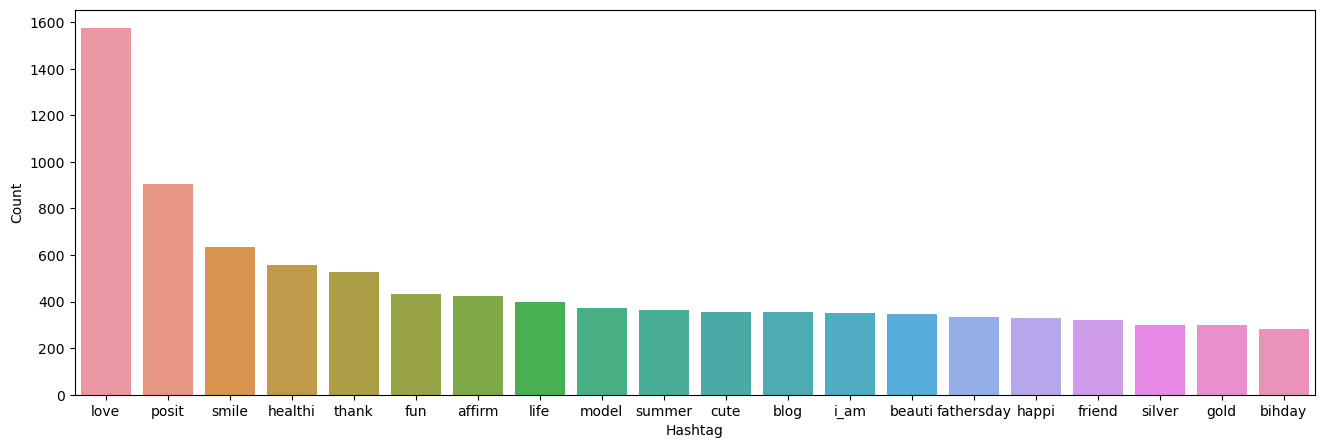

In [160]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

#### Racist/Sexist Tweets

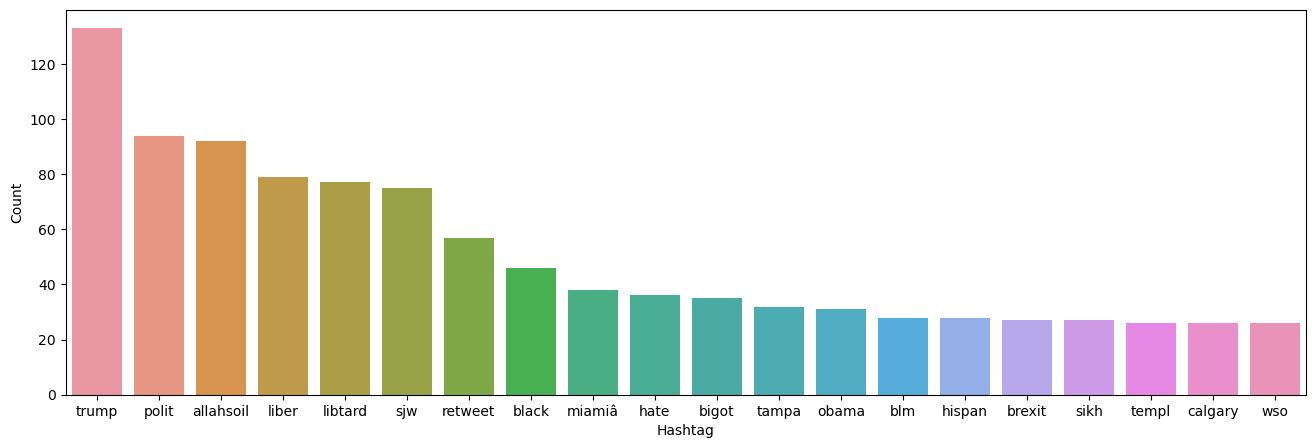

In [161]:
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

In [162]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


### Bag-of-Words Features

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings. Read on to understand these techniques in detail.

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

Let’s start with the Bag-of-Words Features.

Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a dictionary and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

Let us understand this using a simple example.

D1: He is a lazy boy. She is also lazy.

D2: Smith is a lazy person.

The dictionary created would be a list of unique tokens in the corpus =[‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]

Here, D=2, N=6

The matrix M of size 2 X 6 will be represented as –
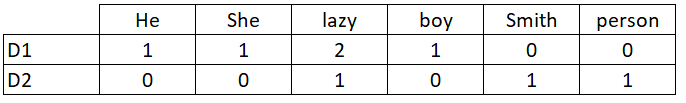

Now the columns in the above matrix can be used as features to build a classification model.

In [164]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [166]:
bow_vectorizer

CountVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

### TF-IDF Features
This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

    TF = (Number of times term t appears in a document)/(Number of terms in the document)

    IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

    TF-IDF = TF*IDF

In [165]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

### Word2Vec Features

Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like King -man +woman = Queen, which is mind-blowing.

Drawing

The advantages of using word embeddings over BOW or TF-IDF are:

    Dimensionality reduction - significant reduction in the no. of features required to build a model.

    It capture meanings of the words, semantic relationships and the different types of contexts they are used in.


1. Word2Vec Embeddings

Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

Below is a diagrammatic representation of a 1-word context window Word2Vec model.
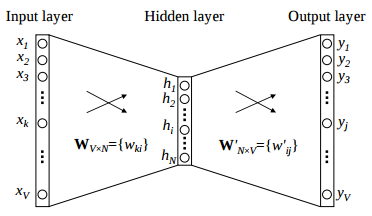


There are three laters: - an input layer, - a hidden layer, and - an output layer.

The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of the vocabulary (no. of unique words in the corpus). The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. The weights learned by the model are then used as the word-vectors.

We will go ahead with the Skip-gram model as it has the following advantages:

    It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.

    Skip-gram with negative sub-sampling outperforms CBOW generally.

We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus. There is one more option of using pre-trained word vectors instead of training our own model. Some of the freely available pre-trained vectors are:

    Google News Word Vectors

    Freebase names

    DBPedia vectors (wiki2vec)

However, for this course, we will train our own word vectors since size of the pre-trained word vectors is generally huge.

Let’s train a Word2Vec model on our corpus.

In [150]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
# tokenizing
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)


TypeError: Word2Vec.__init__() got an unexpected keyword argument 'size'

Let’s play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [31]:
model_w2v.wv.most_similar(positive="dinner")

[('#avocado', 0.5651810169219971),
 ('spaghetti', 0.5569561719894409),
 ('#biall', 0.5433703660964966),
 ('#cellar', 0.5415099859237671),
 ('#bihdaydinn', 0.5395424962043762),
 ('cookout', 0.5392086505889893),
 ('melani', 0.5378689169883728),
 ('#foodcoma', 0.5365987420082092),
 ('gown', 0.5351855158805847),
 ('spinach', 0.5337438583374023)]

From the above two examples, we can see that our word2vec model does a good job of finding the most similar words for a given word. But how is it able to do so? That’s because it has learned vectors for every unique word in our data and it uses cosine similarity to find out the most similar vectors (words).

Let’s check the vector representation of any word from our corpus.

In [32]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.5679628252983093),
 ('hillari', 0.5436031818389893),
 ('phoni', 0.5332872867584229),
 ('#delegaterevolt', 0.5312765836715698),
 ('melo', 0.5281134843826294),
 ('unstabl', 0.5276699066162109),
 ('tomlin', 0.5130662322044373),
 ('unfavor', 0.5111936330795288),
 ('jibe', 0.5052381753921509),
 ('paladino', 0.5038158893585205)]

In [33]:
model_w2v['food']

array([ 2.20337287e-01,  3.39082897e-01,  1.74299717e-01, -1.77666992e-01,
       -4.10870165e-02, -3.74310054e-02,  3.79443705e-01,  7.85684049e-01,
       -9.15053412e-02,  1.81579683e-02, -5.09342551e-01,  1.94702689e-02,
       -5.70967436e-01, -1.28524199e-01,  4.07273710e-01,  1.49309644e-02,
        9.07618552e-02,  8.98923159e-01, -3.10367011e-02, -9.73802283e-02,
       -7.23444521e-01, -8.67770240e-02, -4.03854370e-01,  1.89885989e-01,
       -2.89083533e-02, -5.46516061e-01,  3.60659242e-01, -4.62023079e-01,
       -3.02384973e-01,  2.79993445e-01, -7.03271508e-01,  5.06037593e-01,
       -1.39448717e-01,  1.37796048e-02,  6.34490907e-01, -5.78661030e-03,
        1.81514472e-01, -3.79556596e-01,  1.03678420e-01,  3.11243385e-01,
        8.69879782e-01,  7.17726409e-01,  2.13843390e-01,  2.96366721e-01,
        1.98141858e-01,  4.98899132e-01, -5.79144716e-01,  4.45675582e-01,
        4.86797780e-01,  2.36048192e-01, -7.04347730e-01,  2.42531598e-02,
        9.88449752e-01, -

In [34]:
len(model_w2v['food'])

200

#### Preparing Vectors for Tweets

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [35]:
def word_vector(tokens,size):
    vec = np.zeros(size).reshape((1,size))
    count = 0
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1,size))
            count+=1.
        except KeyError:
            #handling the case where the token is not in vocabulary
            continue
    if count!=0:
        vec/=count
        return vec

In [36]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape   

(49159, 200)

In [37]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


#### 2. Doc2Vec Embedding

Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. This approach is an extension of the word2vec. The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. This additional context is nothing but another feature vector for the whole document. This document vector is trained along with the word vectors.

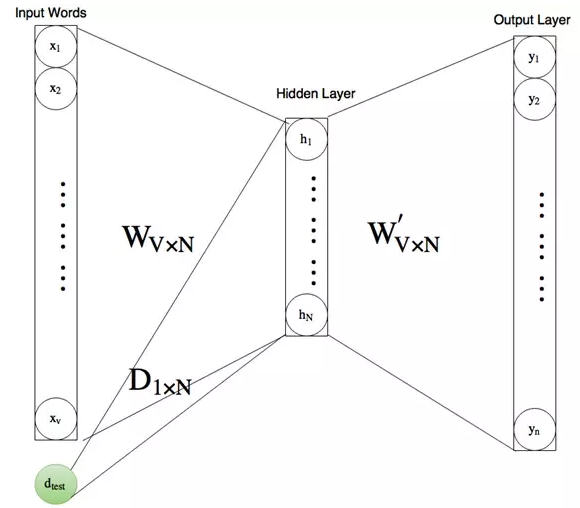

Let’s load the required libraries.

In [38]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

C:\Users\mangi\Anaconda3\envs\tfgpu\lib\site-packages\tqdm\std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [39]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [40]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [41]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
                                  size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                
                                  min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

C:\Users\mangi\Anaconda3\envs\tfgpu\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|███████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 4118977.79it/s]


In [42]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

### Modeling


We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

    Logistic Regression
    Support Vector Machine
    RandomForest
    XGBoost

Evaluation Metric

F1 score is being used as the evaluation metric. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems.

The important components of F1 score are:

    True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.
    True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.
    False Positives (FP) – When actual class is no and predicted class is yes.
    False Negatives (FN) – When actual class is yes but predicted class in no.

Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2(Recall Precision) / (Recall + Precision)


### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [47]:
# Extracting train and test BoW features
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression() 
# # training the model
lreg.fit(xtrain_bow, ytrain) 
# prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
# prediction_int = prediction_int.astype(np.int) 
# f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [49]:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5451327433628319

In [50]:
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
# lreg.fit(xtrain_w2v, ytrain) 
# prediction = lreg.predict_proba(xvalid_w2v)
# prediction_int = prediction[:,1] >= 0.3
# prediction_int = prediction_int.astype(np.int) 
# f1_score(yvalid, prediction_int)

In [52]:
!pip install xgboost

### XGBOOST

In [53]:
from xgboost import XGBClassifier

In [54]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.5247706422018349

In [55]:
test_pred = xgb_model.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_bow.csv', index=False)

In [56]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.5394265232974911

In [57]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6637246248896734

### FineTuning XGBoost + Word2Vec

XGBoost with Word2Vec model has given us the best performance so far. Let’s try to tune it further to extract as much from it as we can. XGBoost has quite a many tuning parameters and sometimes it becomes tricky to properly tune them. This is what we are going to do in the following steps. You can refer this guide to learn more about parameter tuning in XGBoost.

In [64]:
import xgboost as xgb
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

In [65]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

General Approach for Parameter Tuning

We will follow the steps below to tune the parameters.

    Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.

    Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.

    Tune the learning rate.

    Finally tune gamma to avoid overfitting.

Tuning max_depth and min_child_weight

In [66]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]

max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )     
# Finding best F1 Score
    
mean_f1 = cv_results['test-f1_score-mean'].max()
    
boost_rounds = cv_results['test-f1_score-mean'].argmax()    
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))


CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6815327999999999 for 61 rounds
Best params: 9, 7, F1 Score: 0.6815327999999999


C:\Users\mangi\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


In [68]:
#Updating max_depth and min_child_weight parameters.
params['max_depth'] = 9 
params['min_child_weight'] = 7

##### Tuning subsample and colsample

In [70]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]

max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5
	F1 Score 0.6631596 for 53 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.6631596 for 53 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.6631596 for 53 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.6631596 for 53 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.6631596 for 53 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.667572 for 58 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.667572 for 58 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.667572 for 58 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.667572 for 58 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.667572 for 58 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.6716604 for 69 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.6716604 for 69 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.6716604 for 69 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.6716604 for 69 rounds
CV with sub

##### Updating subsample and colsample_bytree

In [71]:
params['subsample'] = .9 
params['colsample_bytree'] = .5

##### Now let’s tune the learning rate.

In [72]:
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3


C:\Users\mangi\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.6730349999999999 for 42 rounds
CV with eta=0.2
	F1 Score 0.6857627999999999 for 166 rounds
CV with eta=0.1
	F1 Score 0.6850428000000001 for 136 rounds
CV with eta=0.05
	F1 Score 0.6688866 for 118 rounds
CV with eta=0.01
	F1 Score 0.1302024 for 0 rounds
CV with eta=0.005
	F1 Score 0.1302024 for 0 rounds
Best params: 0.2, F1 Score: 0.6857627999999999


In [73]:
#Updating the learning rate
params['eta'] = .2
params
{'colsample': 0.9,
 'colsample_bytree': 0.5, 'eta': 0.1,
 'max_depth': 8, 'min_child_weight': 6,
 'objective': 'binary:logistic',
 'subsample': 0.9}

{'colsample': 0.9,
 'colsample_bytree': 0.5,
 'eta': 0.1,
 'max_depth': 8,
 'min_child_weight': 6,
 'objective': 'binary:logistic',
 'subsample': 0.9}

Finally we can now use these tuned parameters in our xgboost model. We have used early stopping of 10 which means if the model’s performance doesn’t improve under 10 rounds, then the model training will be stopped.

In [74]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[21:23:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Validation-error:0.06330	Validation-f1_score:0.13317
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.05746	Validation-f1_score:0.13317
[2]	Validation-error:0.05559	Validation-f1_score:0.39659
[3]	Validation-error:0.05444	Validation-f1_score:0.50567
[4]	Validation-error:0.05256	Validation-f1_score:0.54058
[5]	Validation-error:0.05319	Validation-f1_score:0.56986
[6]	Validation-error:0.05256	Validation-f1_score:0.57513
[7]	Validation-error:0.05298	Validation-f1_score:0.

In [76]:
test_pred = xgb_model.predict(dtest)
#test['label'] = (test_pred >= 0.3).astype(np.int)
#submission = test[['id','label']] 
#submission.to_csv('sub_xgb_w2v_finetuned.csv', index=False)

#### ✨🎊 Congratulations, you've successfully completed the twitter sentiment analysis of racist/sexist tweets!!! Keep moving forward with the same sprit ! Cheers!!🎊✨
#### Our tuning worked! This is our best score!

Now it’s time to wrap-up things. Let’s quickly revisit what we have learned in this course, initially we cleaned our raw text data, then we learned about 4 different types of feature-set that we can extract from any text data, and finally we used these feature-sets to build models for sentiment analysis.

#### WHAT ELSE CAN BE TRIED?

We have covered a lot in this Sentiment Analysis course, but still there is plenty of room for other things to try out. Given below is a list of tasks that you can try with this data.

We have built so many models in this course, we can definitely try model ensembling. A simple ensemble of all the submission files (maximum voting) yielded an F1 score of 0.55 on the public leaderboard.

    1.Use Parts-of-Speech tagging to create new features.

    2.Use stemming and/or lemmatization. It might help in getting rid of unnecessary words.

    3.Use bi-grams or tri-grams (tokens of 2 or 3 words respectively) for Bag-of-Words and TF-IDF.
    
    4.Use bi-grams or tri-grams (tokens of 2 or 3 words respectively) for Bag-of-Words and TF-IDF.

    5.We can give pretrained word-embeddings models a try.

##### 🎉 It's time for credits now!! 🎉

##### Analyticsvidhya Twitter Sentiment Analysis Project
Competetion link: https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/